In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score, r2_score

data = pd.read_csv('C:/Users/user/code/houses_price_analis/Housing.csv')

In [34]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [19]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: xlabel='area', ylabel='price'>

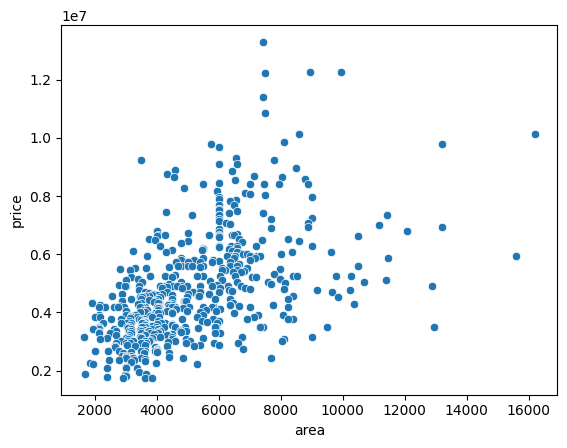

In [20]:
sns.scatterplot(data, x='area', y='price')

In [21]:
low_P, high_P = data['price'].quantile([0.05, 0.95])
low_A, high_A = data['area'].quantile([0.05, 0.95])

In [22]:
data = data[data['price'].between(low_P,high_P) & data['area'].between(low_A,high_A)]

<Axes: xlabel='area', ylabel='price'>

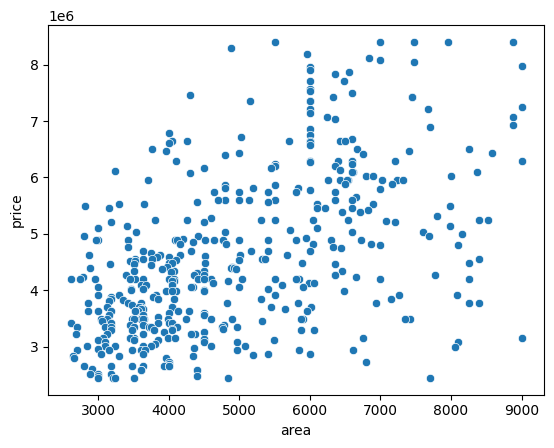

In [24]:
sns.scatterplot(data, x='area', y='price')

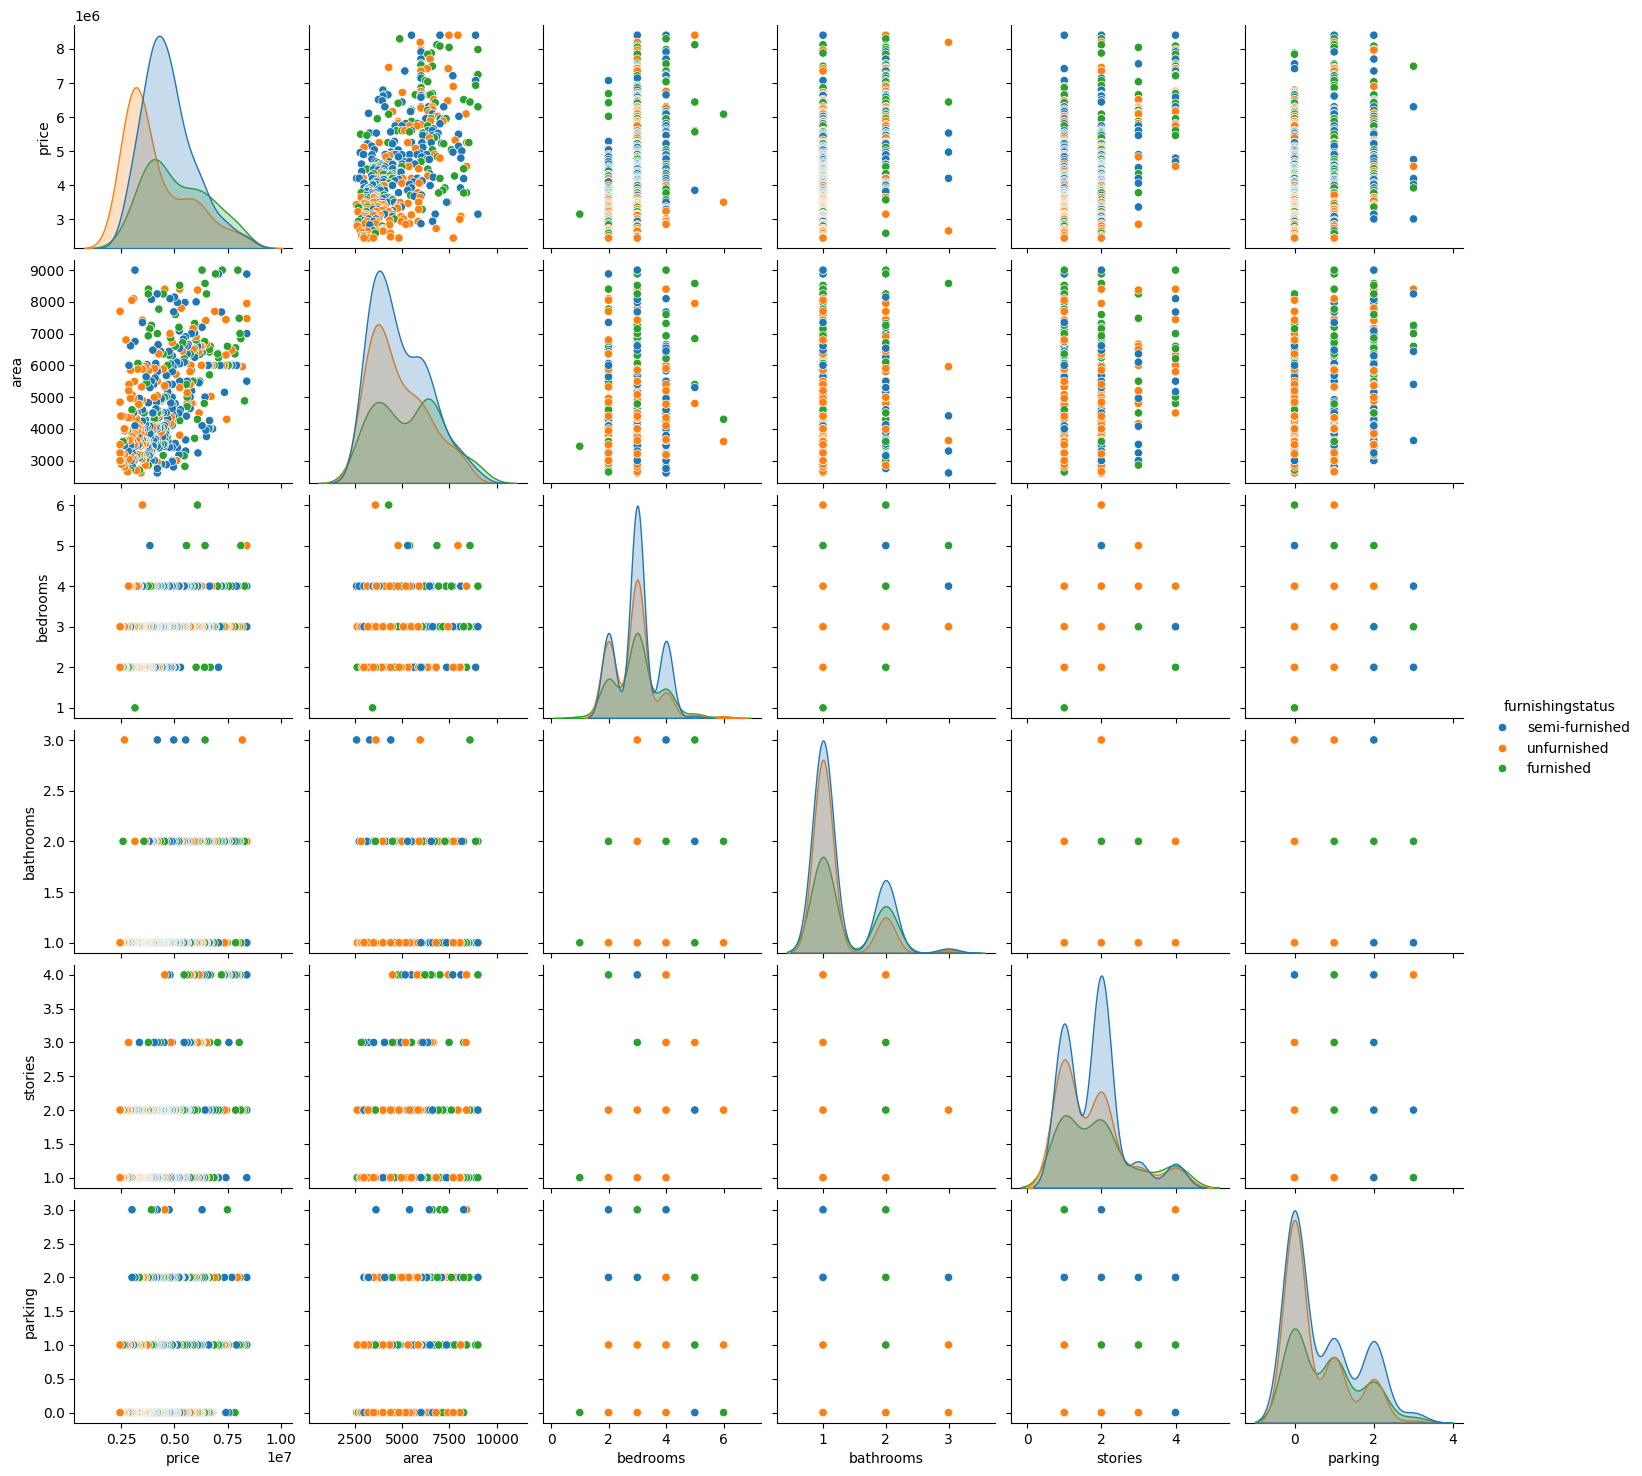

In [25]:
sns.pairplot(data, hue='furnishingstatus')

In [26]:
data.select_dtypes(include='number').corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.522573,0.358475,0.458043,0.484568,0.252978
area,0.522573,1.000000,0.158440,0.154517,0.148624,0.279286
bedrooms,0.358475,0.158440,1.000000,0.337028,0.418281,0.108043
bathrooms,0.458043,0.154517,0.337028,1.000000,0.312890,0.098992
stories,0.484568,0.148624,0.418281,0.312890,1.000000,0.019894
parking,0.252978,0.279286,0.108043,0.098992,0.019894,1.000000


In [32]:
X = pd.getX = pd.get_dummies(data.drop(columns='price'), drop_first=True)
y = data['price']

In [31]:
for column in X.columns:
    X[column] = X[column].astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [36]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

In [38]:
lr_model = LinearRegression()
lr_model.fit(scaled_X_train,y_train)

preds = lr_model.predict(scale_X_test)

MAE = mean_absolute_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test,preds))
score = r2_score(y_test,preds)

print("MAE:" ,MAE)
print("RMSE:" ,RMSE)
print("r2_score:", score)

MAE: 602935.0271427002
RMSE: 810671.9506490962
r2_score: 0.6859237416567439
